In [ ]:
EDA and Preprocessing

In [19]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore

In [21]:
# load the dataset
data=pd.read_csv("Employee.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [23]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [ ]:
Data Exploration: 
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

In [27]:
unique_values = {col: data[col].unique() for col in data.columns}
print("Unique Values in Each Feature:", unique_values)
unique_counts = {col: data[col].nunique() for col in data.columns}
unique_counts

Unique Values in Each Feature: {'Company': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object), 'Age': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.]), 'Salary': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.]), 'Place': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object), 'Country': array(['India'], dtype=object), 'Gender': array([0, 1], dtype=int64)}


{'Company': 6, 'Age': 29, 'Salary': 40, 'Place': 11, 'Country': 1, 'Gender': 2}

In [29]:
# Statistical summary 
statistical_summary = data.describe()
statistical_summary

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [31]:
 # Replace column names
data.columns = ['Company Name', 'Age_of_Employee', 'Salary','Location','Country','Gender'] 
data


,Company Name,Age_of_Employee,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [ ]:
Data Cleaning:
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [33]:
# Standardizing Company names
company_mapping = {
    "Tata Consultancy Services": "TCS",
    "Congnizant": "CTS",
    "Infosys Pvt Lmt": "Infosys"
}
data["Company Name"] = data["Company Name"].replace(company_mapping)
data


,Company Name,Age_of_Employee,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [35]:
# Replacing Age 0 with NaN
data["Age_of_Employee"] = data["Age_of_Employee"].replace(0, pd.NA)

In [41]:
# Dropping duplicate rows
data = data.drop_duplicates()
data


,Company Name,Age_of_Employee,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [39]:
# Checking the cleaned data
data.head()

,Company Name,Age_of_Employee,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [43]:
missing_values = data.isnull().sum()
print("Missing Values in Each Feature:", missing_values)

Missing Values in Each Feature: Company Name        8
Age_of_Employee    23
Salary             23
Location           14
Country             0
Gender              0
dtype: int64


In [45]:
# Filling missing values
data["Company Name"].fillna(data["Company Name"].mode()[0], inplace=True)  # Fill with mode
data["Age_of_Employee"].fillna(data["Age_of_Employee"].median(), inplace=True)  # Fill with median
data["Salary"].fillna(data["Salary"].median(), inplace=True)  # Fill with median
data["Location"].fillna(data["Location"].mode()[0], inplace=True)  # Fill with mode

In [47]:
missing_values = data.isnull().sum()
missing_values

Company Name       0
Age_of_Employee    0
Salary             0
Location           0
Country            0
Gender             0
dtype: int64

In [33]:
# Checking the dataset after filling missing values
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     144 non-null    object 
 1   Age_of_Employee  144 non-null    float64
 2   Salary           144 non-null    float64
 3   Location         144 non-null    object 
 4   Country          144 non-null    object 
 5   Gender           144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


(None,
   Company Name  Age_of_Employee  Salary  Location Country  Gender
 0          TCS             20.0  5000.0   Chennai   India       0
 1      Infosys             30.0  5000.0    Mumbai   India       0
 2          TCS             35.0  2300.0  Calcutta   India       0
 3      Infosys             40.0  3000.0     Delhi   India       0
 4          TCS             23.0  4000.0    Mumbai   India       0)

In [ ]:
Data Analysis:
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually


In [35]:
filtered_data = data[(data['Age_of_Employee'] > 40) & (data['Salary'] < 5000)]
filtered_data


,Company Name,Age_of_Employee,Salary,Location,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


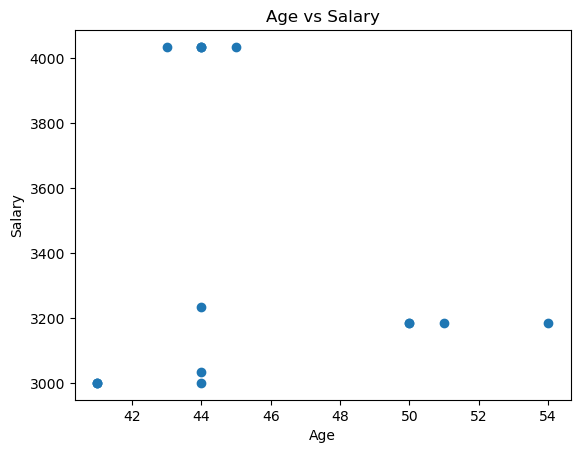

In [37]:
plt.scatter(filtered_data['Age_of_Employee'], filtered_data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

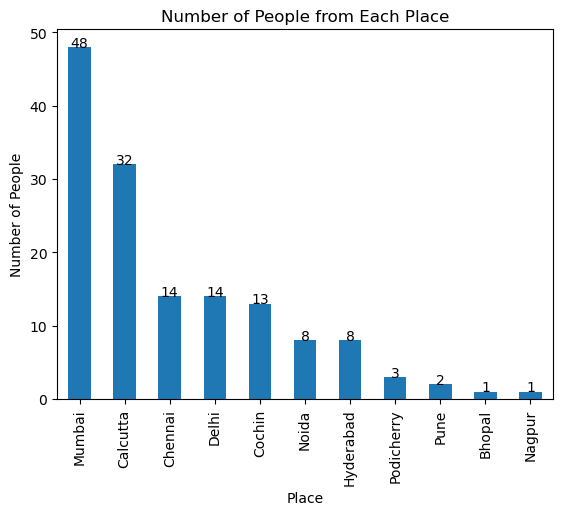

In [49]:
place_counts = data['Location'].value_counts()
place_counts.plot(kind='bar')
for i, v in enumerate(place_counts):
    plt.text(i, v + 0.05, str(v), ha='center')
plt.xlabel('Place')
plt.ylabel('Number of People')
plt.title('Number of People from Each Place')
plt.show()


In [ ]:
Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


In [41]:
# one-hot encoding

encoded_data = pd.get_dummies(data, columns=['Company Name','Location'])
encoded_data

,Age_of_Employee,Salary,Country,Gender,Company Name_CTS,Company Name_Infosys,Company Name_TCS,Location_Bhopal,Location_Calcutta,Location_Chennai,Location_Cochin,Location_Delhi,Location_Hyderabad,Location_Mumbai,Location_Nagpur,Location_Noida,Location_Podicherry,Location_Pune
0,20.0,5000.0,India,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5000.0,India,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.0,India,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,India,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.0,India,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,India,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.0,India,1,False,False,True,False,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.0,India,1,False,True,False,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.0,India,1,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [43]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
categorical_cols = ["Company Name", "Location"]

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Checking the transformed data
data.head()

,Company Name,Age_of_Employee,Salary,Location,Country,Gender
0,2,20.0,5000.0,2,India,0
1,1,30.0,5000.0,6,India,0
2,2,35.0,2300.0,1,India,0
3,1,40.0,3000.0,4,India,0
4,2,23.0,4000.0,6,India,0


In [51]:

# Initializing scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Applying StandardScaler and MinMaxScaler to numerical features
data["Age_Standard"] = standard_scaler.fit_transform(data[["Age_of_Employee"]])
data["Salary_Standard"] = standard_scaler.fit_transform(data[["Salary"]])

data["Age_MinMax"] = minmax_scaler.fit_transform(data[["Age_of_Employee"]])
data["Salary_MinMax"] = minmax_scaler.fit_transform(data[["Salary"]])

# Checking the scaled data
data.head()

,Company Name,Age_of_Employee,Salary,Location,Country,Gender,Age_Standard,Salary_Standard,Age_MinMax,Salary_MinMax
0,2,20.0,5000.0,2,India,0,-1.484676,-0.100827,0.081081,0.445089
1,1,30.0,5000.0,6,India,0,-0.267174,-0.100827,0.351351,0.445089
2,2,35.0,2300.0,1,India,0,0.341577,-1.243735,0.486486,0.137817
3,1,40.0,3000.0,4,India,0,0.950328,-0.947426,0.621622,0.217480
4,2,23.0,4000.0,6,India,0,-1.119426,-0.524127,0.162162,0.331285
